In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_data, y_data),(X_test,y_test) = fashion_mnist.load_data() #load full data as x_data, y_data and testing data as x_testm, y_test

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
X_data.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
np.unique(y_data)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
X_data = X_data / 255
X_test = X_test / 255  #normalize data to fall between 0 and 1


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_data,y_data,shuffle=True,stratify =y_data) #Split into training and validation set

In [10]:
X_train.shape

(45000, 28, 28)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] #class names of fashion features

In [56]:
fashion_label = y_train[0]

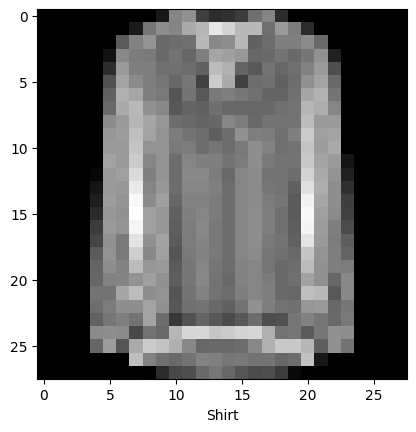

In [57]:
import matplotlib.pyplot as plt
plt.imshow(X_train[fashion_label], cmap='gray') # cmap to make it recognize grayscale
plt.xlabel(class_names[y_train[fashion_label]])
plt.show()

In [14]:
#using tensorflow

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
train_data , test_data = fashion_mnist.load_data()

In [17]:
train_data = tf.data.Dataset.from_tensor_slices(train_data)
test_data = tf.data.Dataset.from_tensor_slices(test_data)

In [18]:
train_data.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=60000>

In [19]:
#normalizing train and test sets
train_data = train_data.map(lambda x,y: (tf.cast(x,tf.float32)/255.,y))
test_data = test_data.map(lambda x,y: (tf.cast(x,tf.float32)/255.,y))

In [20]:
#split train_data into training set and validation set
train_tf = train_data.take(45000)
valid_tf = train_data.skip(45000)

In [21]:
# or Split using keras.utils.split
train_tf , valid_tf = keras.utils.split_dataset(train_data,left_size=0.75,shuffle=True)

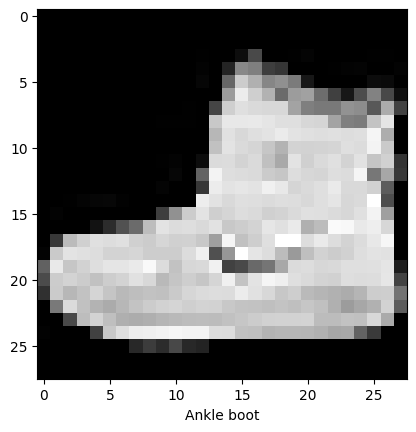

In [22]:
# take one element and plot it
for element in train_data.take(1):
  plt.imshow(element[0], cmap='gray') # cmap to make it recognize grayscale
  plt.xlabel(class_names[element[1]])
  plt.show()


In [23]:
# process training set - Add repeat shuffle and batching

In [24]:
BUFFER_SIZE = 45000
BATCH_SIZE = 32
REPEAT_SIZE = 2

In [25]:
train_tf_processed = train_tf.repeat(REPEAT_SIZE).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
valid_tf_processed = valid_tf.batch(BATCH_SIZE)

# creating a fully connected sequential network to train for classificaton

In [27]:
#creating a model
model = keras.models.Sequential()  #sequential model initialization

model.add(keras.layers.Input([28,28],name = 'input'))  #input layer
model.add(keras.layers.Flatten())  #flattening the image to a vector space
model.add(keras.layers.Dense(300,activation = keras.activations.relu,name = 'dense1'))
model.add(keras.layers.Dense(100,activation = keras.activations.relu,name = 'dense2'))
model.add(keras.layers.Dense(10,activation = keras.activations.softmax,name = 'output'))   #output layers of 10 features



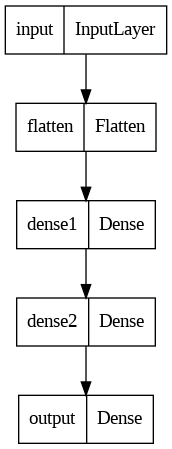

In [28]:
# visualize the created model
keras.utils.plot_model(model)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 300)               235500    
                                                                 
 dense2 (Dense)              (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# get the weights and bias of a layer
dense1 = model.layers[1]
weights , bias = dense1.weights

In [33]:
weights

<tf.Variable 'dense1/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[ 4.58545685e-02, -5.13100773e-02,  3.10023800e-02, ...,
        -5.09206951e-02, -5.00435047e-02,  5.58684021e-02],
       [-4.95282188e-02,  4.28086966e-02, -6.69103414e-02, ...,
        -2.75735110e-02,  4.90500778e-02,  9.37899947e-03],
       [ 1.21346042e-02, -9.34191048e-03, -5.70797548e-02, ...,
         5.95232695e-02, -3.40349488e-02, -5.63591048e-02],
       ...,
       [-2.11928859e-02, -7.16146901e-02,  4.32349741e-03, ...,
         6.90797120e-02,  2.59815380e-02, -1.58494636e-02],
       [-3.25677469e-02, -1.79784857e-02,  3.26787680e-03, ...,
         1.14662275e-02, -2.74288431e-02,  7.31254667e-02],
       [-5.86351193e-02,  1.45193413e-02, -3.01897526e-05, ...,
         4.72471491e-02, -4.19861935e-02,  1.80712342e-02]], dtype=float32)>

In [34]:
bias

<tf.Variable 'dense1/bias:0' shape=(300,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0

In [35]:
# compile the model with loss, optimizer and metrics
model.compile(loss='sparse_categorical_crossentropy',optimizer = keras.optimizers.SGD(learning_rate=0.01), metrics = ['accuracy']) #using sparse cross entropy loss with sgd optimizer

In [37]:
# fit the model
history = model.fit(train_tf_processed,validation_data = valid_tf_processed,epochs=20)

Epoch 1/20
2813/2813 [==============================] - 15s 5ms/step - loss: 0.6346 - accuracy: 0.7876 - val_loss: 0.4727 - val_accuracy: 0.8345
Epoch 2/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4456 - accuracy: 0.8444 - val_loss: 0.4293 - val_accuracy: 0.8499
Epoch 3/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4051 - accuracy: 0.8580 - val_loss: 0.3954 - val_accuracy: 0.8619
Epoch 4/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3761 - accuracy: 0.8671 - val_loss: 0.3736 - val_accuracy: 0.8679
Epoch 5/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3561 - accuracy: 0.8754 - val_loss: 0.3835 - val_accuracy: 0.8616
Epoch 6/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3390 - accuracy: 0.8794 - val_loss: 0.3694 - val_accuracy: 0.8621
Epoch 7/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3238 - accuracy: 0.8852 - val_loss: 0.3328 - val_ac

In [40]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 2813}

In [42]:
history.history  #history of plotting

{'loss': [0.6346011161804199,
  0.4456307291984558,
  0.4051016867160797,
  0.37608879804611206,
  0.3560805320739746,
  0.33900588750839233,
  0.3237524628639221,
  0.3104257881641388,
  0.29858291149139404,
  0.28705111145973206,
  0.2767566740512848,
  0.26710090041160583,
  0.25767138600349426,
  0.2491714358329773,
  0.24133192002773285,
  0.23354537785053253,
  0.22605876624584198,
  0.21859510242938995,
  0.21201950311660767,
  0.20581011474132538],
 'accuracy': [0.7875666618347168,
  0.8443777561187744,
  0.858044445514679,
  0.8670666813850403,
  0.8754110932350159,
  0.8793777823448181,
  0.8851555585861206,
  0.8889999985694885,
  0.8933444619178772,
  0.8966666460037231,
  0.8994222283363342,
  0.9032889008522034,
  0.9076555371284485,
  0.9106666445732117,
  0.9136444330215454,
  0.9157666563987732,
  0.9187111258506775,
  0.9215666651725769,
  0.9236222505569458,
  0.9257000088691711],
 'val_loss': [0.47274351119995117,
  0.42926037311553955,
  0.39541181921958923,
  0.37

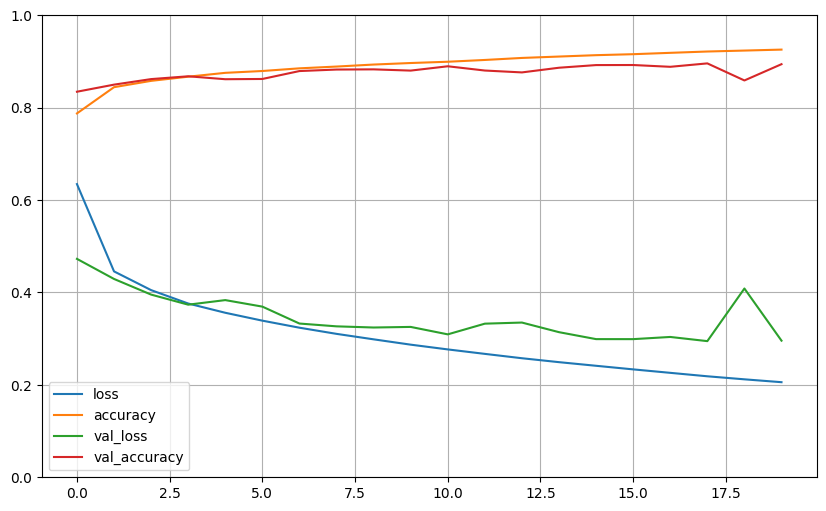

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [45]:
model.evaluate(X_test,y_test) #evaluation on test set

313/313 [==============================] - 3s 10ms/step - loss: 0.3360 - accuracy: 0.8831


[0.3359644114971161, 0.8830999732017517]

In [47]:
#prediction
X_new = X_test[:5]
y_probability = model.predict(X_new)
y_probability.round(2)

1/1 [==============================] - 0s 36ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.08, 0.  , 0.01, 0.  , 0.  , 0.  , 0.9 , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
import numpy as np
np.array(class_names)[np.argmax(y_probability, axis=1)] #check with class names

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [58]:
#save the model
model.save('fashion_classification_sample.keras')